
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Gráficos simples

En esta *notebook* recorremos distintos tipos básicos de gráficos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo en el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

* Encontrar el gráfico adecuado para los datos.
* Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
* Encontrar los *encodings* visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta *notebook*).


In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [2]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [3]:
seaborn.__version__

'0.11.1'

## Lectura del dataset

En la notebook *00* se explican los detalles de la siguiente sección.

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [6]:
salary_col = 'salary_monthly_NETO'

sorted_studies_levels = [ 'Primario'
                        , 'Secundario'
                        , 'Terciario'
                        , 'Universitario'
                        , 'Posgrado'
                        , 'Doctorado'
                        , 'Posdoctorado'
                        ]

In [7]:
def filtroEdad(df, max_age = 100):
    # Filtra DF por edad máxima.
    return df[df.profile_age < max_age]

def filtroSalario(df, max_salary = 500000):
    # Filtra DF por salario máximo.
    return df[df[salary_col] < max_salary]

def filtroExperiencia(df, max_experience = 40):
    # Filtra DF por experiencia máxima.
    return df[df.profile_years_experience < max_experience]

def filtroGenero(df):
    # Filtra DF por identidad de género.
    return df[df.profile_gender != 'Otros']

## Tablas

Las tablas, como todas las que hemos estado usando hasta ahora, son muchas veces dejadas de lado en las visualizaciones. Sin embargo, son una de las formas de representación más poderosa. Usualmente partimos de una tabla para generar visualizaciones más complejas, pero esto no significa que generar buenas tablas no sea útil en el proceso de comunicación.

* Muestran cantidades exactas.
* Representan cualquier tipo de datos.
* Son de acceso universal.
* Son fáciles de crear.
* Permiten comprar muchas variables.

También *pandas* nos permite otras operaciones simples de **estadística descriptiva**. En la siguiente celda, estamos describiendo la distribución de la columna de `salary_monthly_NETO`, para distintos niveles de estudios.

In [8]:
group_col = 'profile_studies_level'
df[[group_col, salary_col]].groupby(group_col).describe().loc[sorted_studies_levels]

salary_monthly_NETO                                \
                                    count           mean            std   
profile_studies_level                                                     
Primario                              2.0   87500.000000   45961.940777   
Secundario                          434.0   82686.351857   89015.514211   
Terciario                          1106.0   80814.433784   73045.051749   
Universitario                      3991.0   97410.224414   99056.902960   
Posgrado                            317.0  124166.795300  110533.626251   
Doctorado                            29.0   91629.115517   80804.752362   
Posdoctorado                          4.0  529875.000000  664606.446829   

                                                                         
                           min       25%       50%       75%        max  
profile_studies_level                                                    
Primario               55000.0   71250.0   87500.0  103750.0   120000.0  
Secundario                 1.0   42250.0   65000.0   93000.0  1250000.0  
Terciario                  1.0   46000.0   68000.0   93000.0  1000000.0  
Universitario              1.0   53220.0   80000.0  108000.0  2080000.0  
Posgrado                   2.0   76000.0  100000.0  143175.0  1190000.0  
Doctorado                 70.0   45000.0   88900.0  100000.0   350000.0  
Posdoctorado           87000.0  104250.0  266250.0  691875.0  1500000.0

## Gráficos de barras/columnas

* Eje **x**: variable categórica.
* Eje **y**: variable numérica.

(Se puede hacer "acostado" también, invirtiendo el orden)

Comparan cantidades numéricas entre variables categóricas. Son uno de los *encodings* más fieles y fáciles de percibir, es decir, que podemos leer las cantidades representadas con más exactitud que en otros tipos de gráficos.

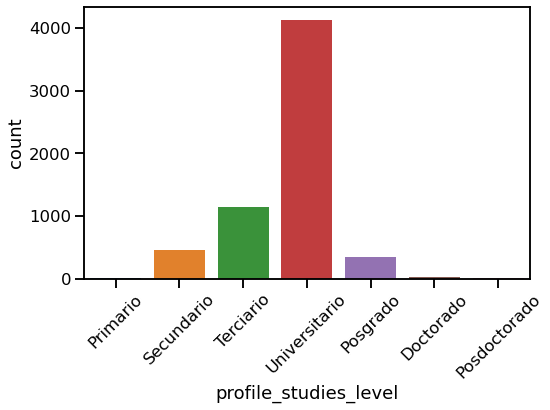

In [9]:
fig = plt.figure(figsize=(8, 5))

seaborn.countplot(data=df, x='profile_studies_level', order=sorted_studies_levels)
plt.xticks(rotation=45);

Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras, más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son los más adecuados para ver las variables categóricas, por ejemplo, el nivel de estudios. En el eje *y* debemos poner una variable numérica. En este caso, vamos a utilizar la v.a. *media del salario neto*. Para eso, podemos muy fácilmente pasarle a `seaborn` una función para calcular sobre la columna de salario usando el parámetro `estimator`.

**Nota** El valor del `estimator` es por defecto la media, pero ahora lo hacemos explícito. Podríamos haber seleccionado otra función, como `numpy.median`, o haber definido una nueva.

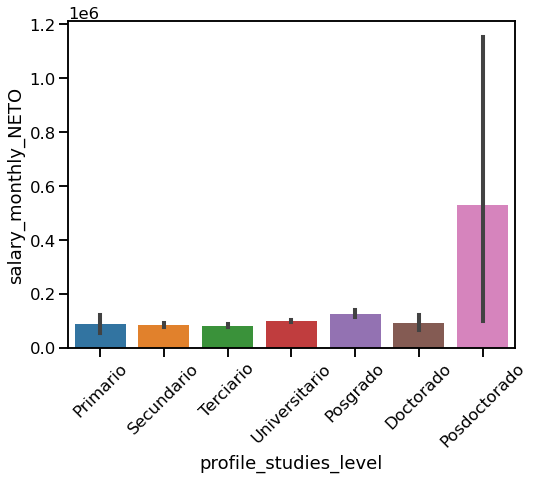

In [10]:
fig = plt.figure(figsize=(8, 6))

seaborn.barplot(data=df,
                x='profile_studies_level',
                y=salary_col,
                estimator=numpy.mean,
                order=sorted_studies_levels)
plt.xticks(rotation=45);

En este gráfico estamos usando la altura de las barras para representar el promedio de las estimaciones de salario para cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. El usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, el nombre original de la columna no representa la información agregada.

Por otra parte, ¿qué significan las líneas negras? Son los **intervalos de confianza**, que tienen un valor por *default* de 95. Indican que el verdadero valor poblacional del estadístico se encuentra en ese rango, con una confianza del 95%. Por eso vemos que (probablemente) para varones y mujeres, el rango es mucho más pequeño, ya que la muestra es mucho más grande. Para otros grupos minoritarios, no tenemos certeza del valor real de la media poblacional porque la muestra es demasiado pequeña.

Este estadístico suele ser difícil de interpretar para quienes no son expertos en estadística. Puede ser conveniente reemplazarlo por la desviación estándar de la muestra. Si bien estamos usando la misma codificación visual (las rayitas negras), los valores que representamos son completamente distintos. Si usamos un intervalo de confianza, estamos hablando de la distribución del estimador de la media poblacional, que es una variable aleatorio que toma valores en todas las muestras posibles. Por otro lado, si usamos la desviación estándar, estamos hablando del valor del estadístico en esta muestra. Pueden explorar ambos valores, pero para este caso, ninguno aporta información útil para el análisis.

Por último, y como estuvimos viendo en clase, algunas de las categorías tienen muy pocos valores para ser útiles. Por lo tanto, las vamos a agrupar.

Con esas observaciones, podemos construir un gráfico más representativo.

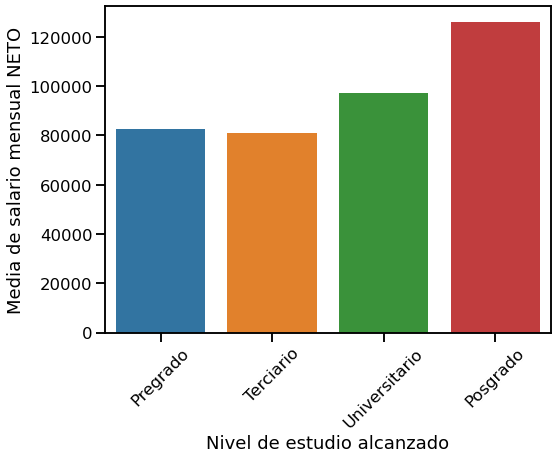

In [11]:
new_groups = {
    'Primario': 'Pregrado',
    'Secundario': 'Pregrado',
    'Doctorado': 'Posgrado',
    'Posdoctorado': 'Posgrado'
}
order = ['Pregrado', 'Terciario', 'Universitario', 'Posgrado']
grouped_studies_level = df.profile_studies_level.replace(new_groups)

fig = plt.figure(figsize=(8, 6))

seaborn.barplot(x=grouped_studies_level,
                y=df[salary_col],
                estimator=numpy.mean,
                ci=None,
                order=order
                )
plt.xticks(rotation=45)
plt.xlabel("Nivel de estudio alcanzado")
plt.ylabel("Media de salario mensual NETO")
plt.ticklabel_format(style='plain', axis='y')

### Agrupaciones

Cuando queremos comparar distintos grupos, podemos usar el parámetro `hue`. Esto equivale a sumar otra v.a. al gráfico, que deberá ser categórica.

In [12]:
df.profile_studies_level_state.unique()

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

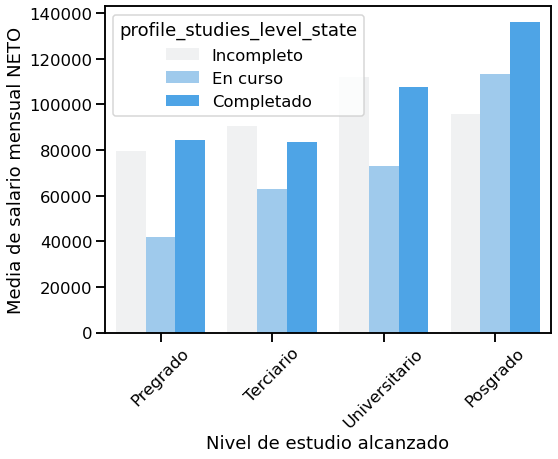

In [13]:
hue_order = ['Incompleto', 'En curso', 'Completado']

fig = plt.figure(figsize=(8, 6))

seaborn.barplot(x=grouped_studies_level,
                y=df[salary_col],
                hue=df.profile_studies_level_state,
                estimator=numpy.mean,
                ci=None,
                color=BLUE,
                order=order, hue_order=hue_order)
plt.xticks(rotation=45)
plt.xlabel("Nivel de estudio alcanzado")
plt.ylabel("Media de salario mensual NETO")
plt.ticklabel_format(style='plain', axis='y')

## Gráficos de línea

* Eje **x**: variable numérica *continua*.
* Eje **y**: variable numérica.

Es efectivo para comparar *cantidades numéricas*. Si lo comparamos con un gráfico de barras, tienen ventajas y desventajas. En primer lugar, sugiere una relación más fuerte entre los datos del eje horizontal, que deben ser secuenciales. Además de ello, pueden representar más valores ya que el peso visual de cada punto es mucho menor que una barra.

Por otra parte, un gráfico de líneas con pocos puntos puede ser indicativo de una tendencia que no existe (o que no tenemos suficientes datos como para mostrarla).

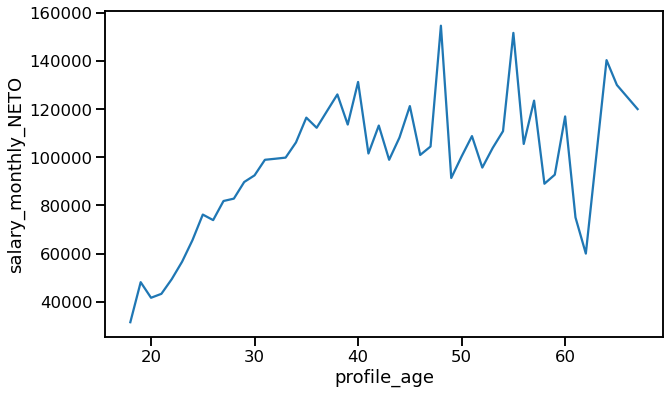

In [14]:
plt.figure(figsize=(10, 6))

seaborn.lineplot(data=filtroEdad(df),
                 x='profile_age',
                 y=salary_col,
                 estimator=numpy.mean,
                 ci=None);

### Binarización o Segmentación

En el gráfico anterior, vemos que la línea se vuelve muy errática a partir de los 40 años. Esto es porque para cada edad a partir de ese punto, existen muy poco datos.

Para solucionar este problema podemos crear rangos etáreos de 5 años. La función `pandas.cut` sirve para este tipo de situaciones.

In [15]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        # BUG ValueError: Overlapping IntervalIndex is not accepted.
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [16]:
df['profile_age_segment'] = to_categorical(filtroEdad(df).profile_age)

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 67)]


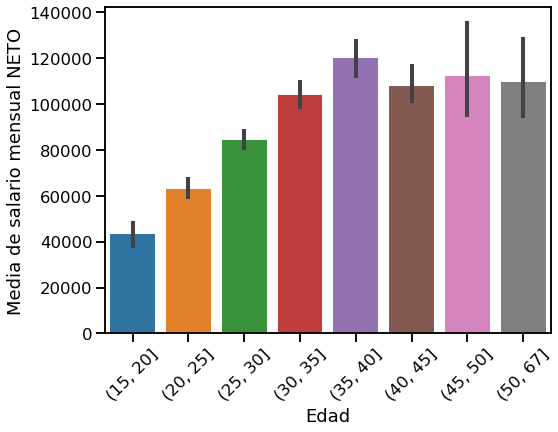

In [17]:
fig = plt.figure(figsize=(8, 6))

seaborn.barplot(data=df,
                x='profile_age_segment',
                y=salary_col)
plt.xticks(rotation=45)
plt.xlabel("Edad")
plt.ylabel("Media de salario mensual NETO")
plt.ticklabel_format(style='plain', axis='y')

#### Opcional

El gráfico anterior también puede mostrarse como un gráfico de puntos unidos. Notar que no es lo mismo que un gráfico de líneas, aunque logramos una representación menos "pesada" visualmente. Además de ello, podemos utilizar funciones para transformar los números correspondientes a los salarios que se muestran en cada eje, llamados `ticks`.

In [18]:
from matplotlib import ticker

# Formatter for salaries.
@ticker.FuncFormatter
def k_formatter(x, pos):
    return f'{x / 1000:.0f}K'

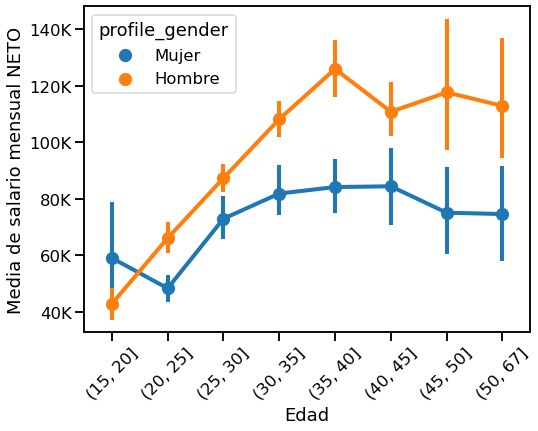

In [19]:
fig = plt.figure(figsize=(8, 6))

seaborn.pointplot(data=filtroGenero(df),
                  x='profile_age_segment',
                  y=salary_col,
                  hue='profile_gender')
plt.xticks(rotation=45)
plt.xlabel("Edad")
plt.ylabel("Media de salario mensual NETO")
plt.ticklabel_format(style='plain', axis='y')
fig.axes[0].yaxis.set_major_formatter(k_formatter)

## Gráficos de puntos (scatterplots)

* Eje **x**: variable numérica *continua*.
* Eje **y**: variable numérica *continua*.

Muestra la relación entre 2 o 3 variables numéricas continuas. Adicionalmente, se puede usar el color y la forma de los puntos para variables categóricas, y el tamaño para una variable numérica extra.

En el siguiente gráfico se ve como, a pesar de que la edad es una variable continua, el *scatterplot* no es una visualización que permita encontrar patrones en los datos ya que los puntos se superponen demasiado.

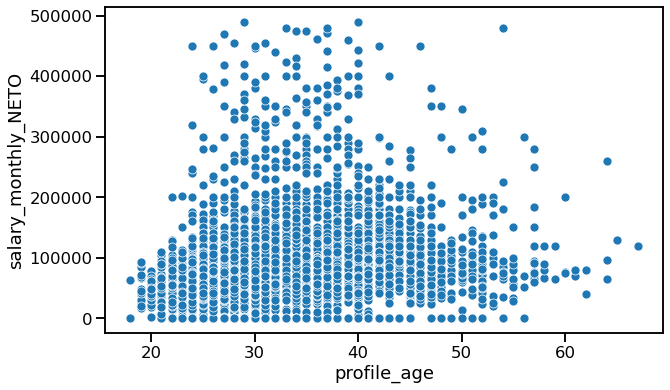

In [20]:
plt.figure(figsize=(10, 6))

seaborn.scatterplot(data=filtroSalario(filtroEdad(df)),
                    x='profile_age',
                    y=salary_col);

En este conjunto de datos en particular, el *scatterplot* no nos ayuda a esclarecer las distribuciones de las variables. Esto sucede por dos motivos:
* Los valores se acumulan en algunos rangos y son muy esparsos en otros.
* Hay demasiados datos como para que cada punto aporte información relevante.

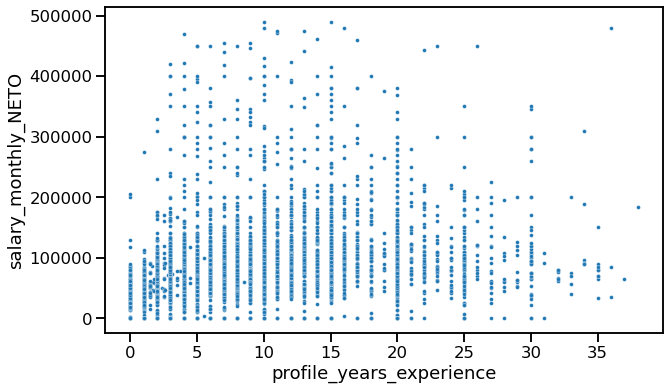

In [21]:
plt.figure(figsize=(10, 6))

seaborn.scatterplot(data=filtroExperiencia(filtroSalario(filtroEdad(df))),
                    x='profile_years_experience',
                    y=salary_col,
                    marker="o",
                    s=15);

Sin embargo, el poder de los *scatterplots* radica en que el elemento gráfico usado (el punto) tiene un peso visual muy bajo, y por lo tanto podemos codificar múltiples variables en una misma visualización.

In [22]:
df['salary_is_usd_bool'] = df.salary_in_usd.notna()
df.salary_is_usd_bool.value_counts()

False    5419
True      676
Name: salary_is_usd_bool, dtype: int64

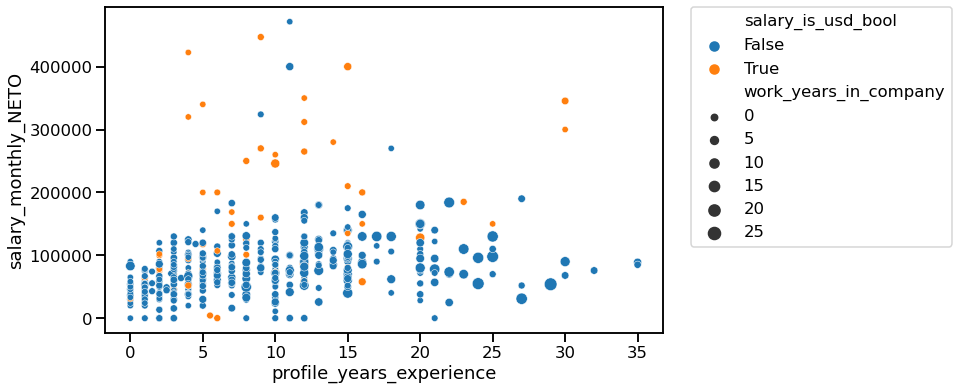

In [23]:
plt.figure(figsize=(10, 6))

seaborn.scatterplot(data=filtroExperiencia(filtroSalario(filtroEdad(df))).sample(500),
                    x='profile_years_experience',
                    y=salary_col,
                    hue='salary_is_usd_bool',
                    size='work_years_in_company',
                    marker='o')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);

#### Opcional

Para evitar la superposición de puntos, se puede graficar sólo una muestra de los datos.

Para algunos análisis puede ser conveniente que dicha muestra no sea aleatoria. Por ejemplo, cuando queremos incluir todos o la mayoría de los registros de una subpoblación. 

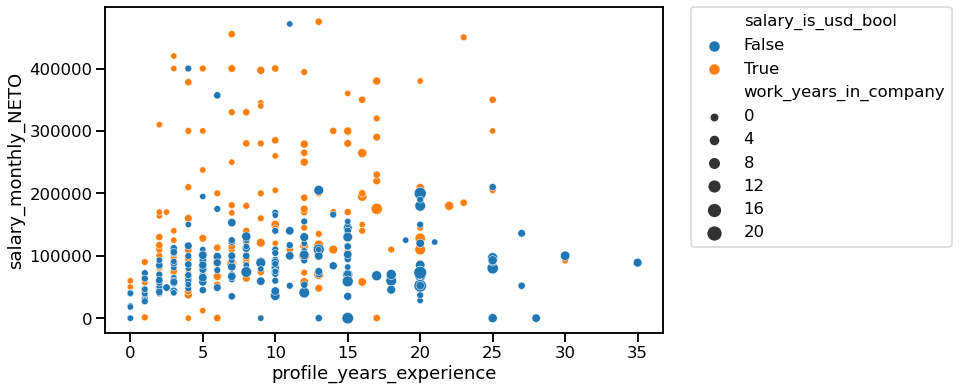

In [24]:
plt.figure(figsize=(10, 6))

mask = (df.profile_years_experience < 40) & (df[salary_col] < 500000)

# Take some salaries in USD.
usd_salaries = df[df.salary_is_usd_bool].sample(200)
# Take some salaries not in USD.
not_usd_salaries = df[~df.salary_is_usd_bool].sample(200)

mixed_df = pd.concat([usd_salaries, not_usd_salaries])

seaborn.scatterplot(data=filtroExperiencia(filtroSalario(filtroEdad(mixed_df))),
                    x='profile_years_experience',
                    y=salary_col,
                    hue='salary_is_usd_bool',
                    size='work_years_in_company',
                    marker='o')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);